## Importing libraries and getting to know about data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE

from warnings import filterwarnings
filterwarnings(action='ignore')

wine = pd.read_csv("winequalityN.csv").dropna()

wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
print(wine.shape)

(6463, 13)


In [3]:
wine.describe(include='all')

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,NaN,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,NaN,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,NaN,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,NaN,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,NaN,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000


## Finding null values

In [4]:
print(wine.isna().sum())

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## DATA VISUALIZATION

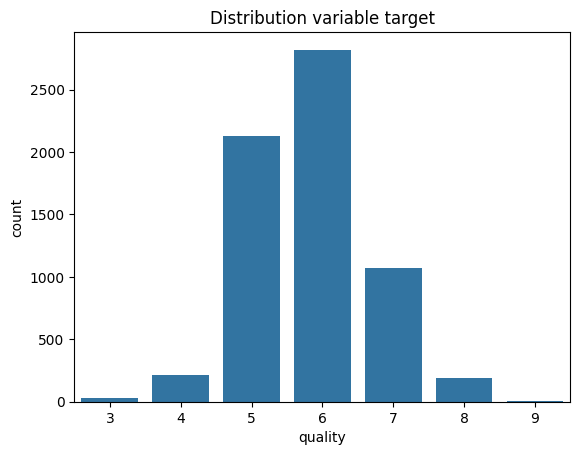

In [5]:
sns.countplot(data = wine, x = 'quality')
plt.title("Distribution variable target")
plt.show()


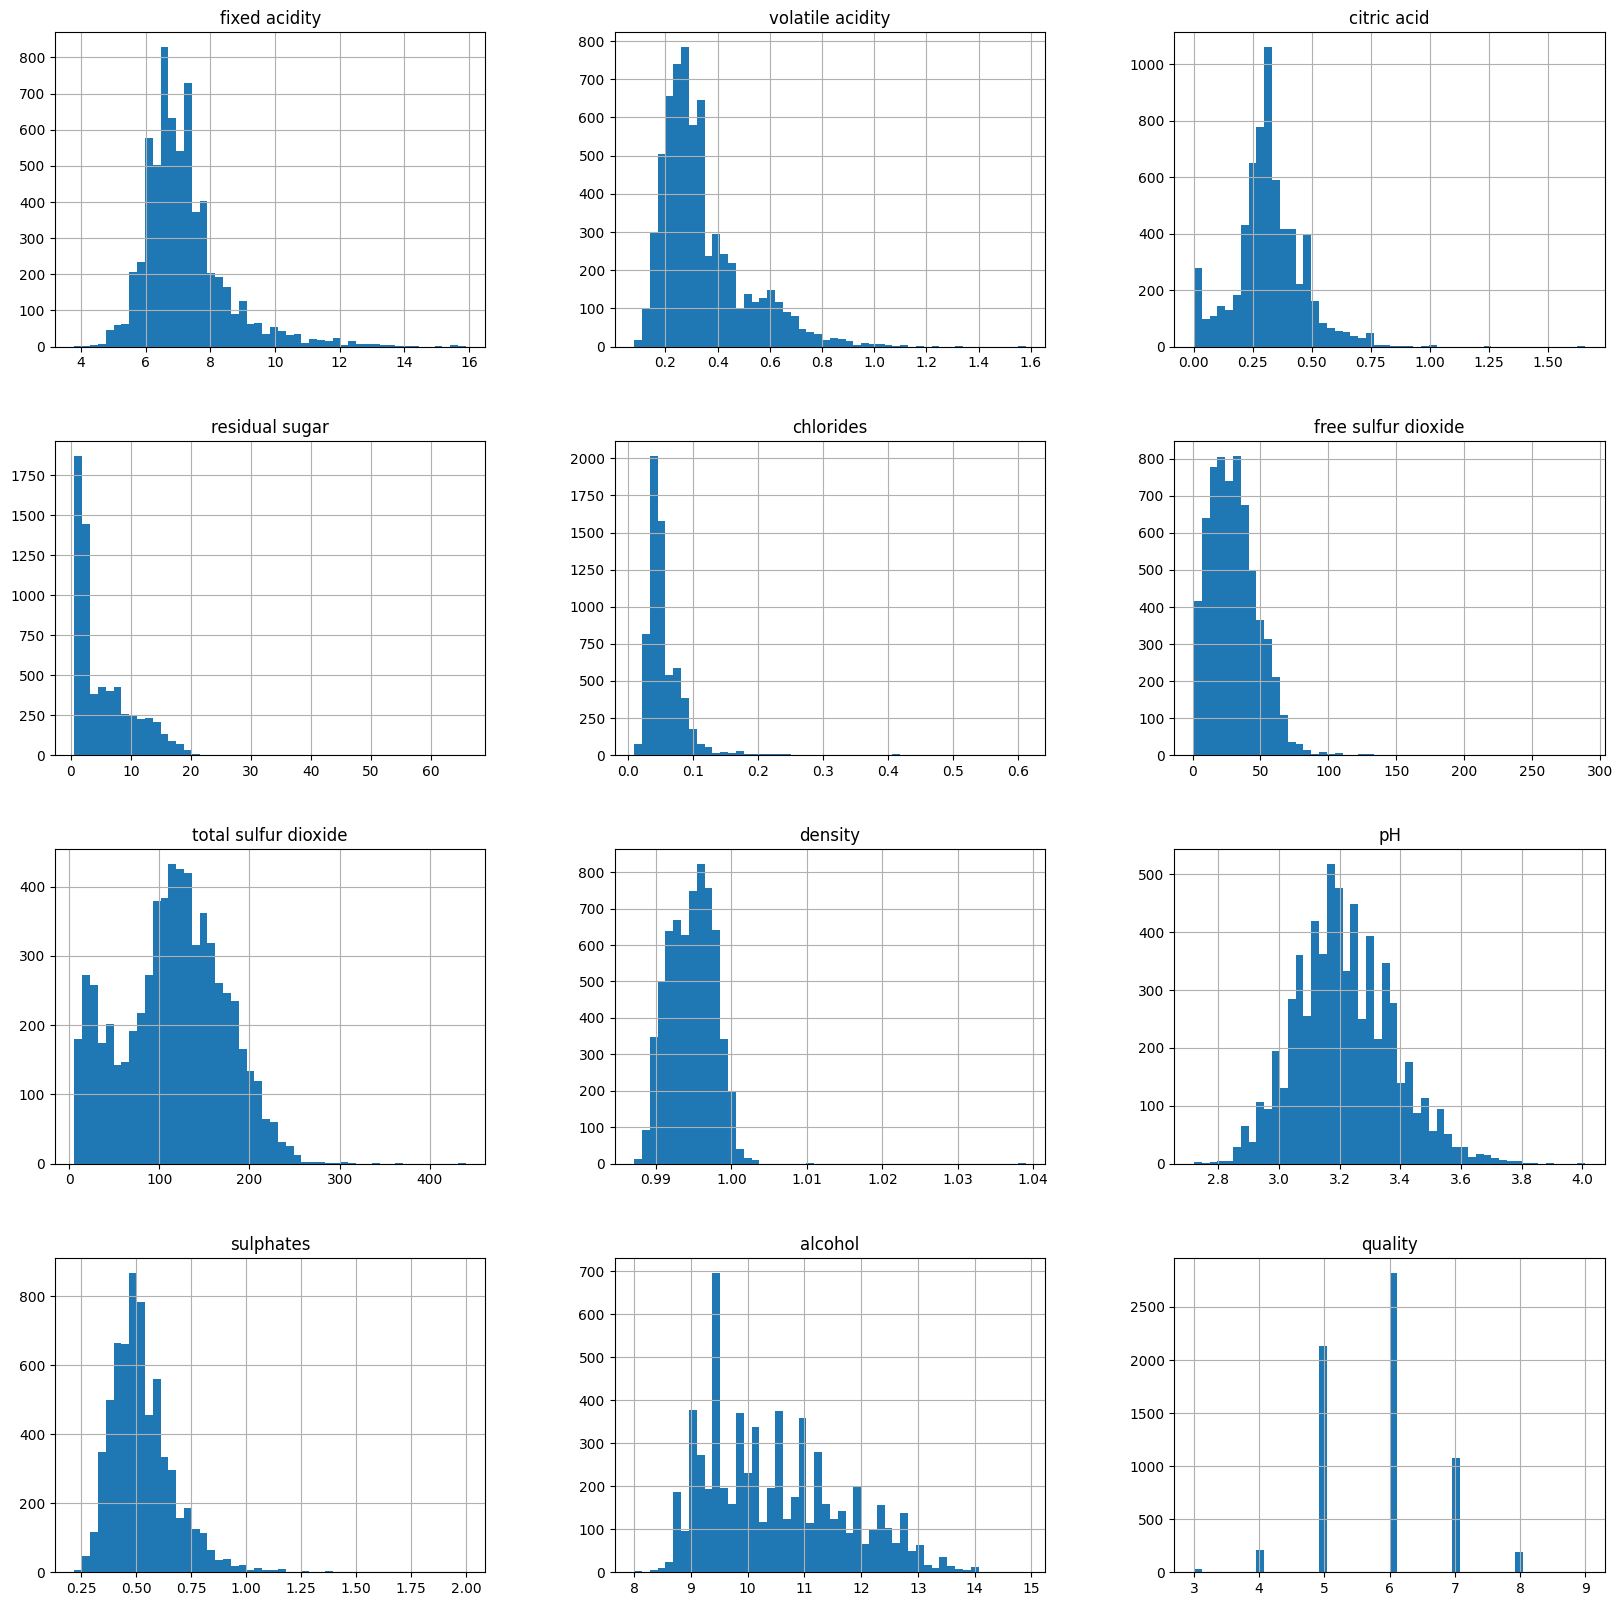

In [6]:
wine.hist(figsize=(20,20),bins=50)
plt.show()

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


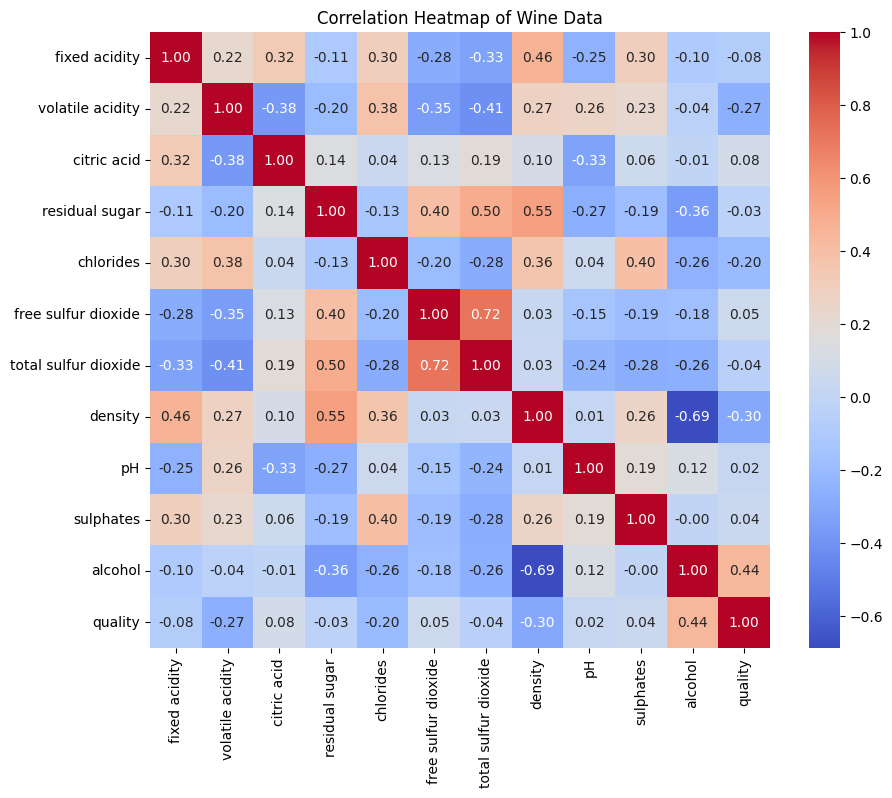

In [7]:
# Check data types of all columns
print(wine.dtypes)

# If there are non-numeric columns, consider excluding them or converting them
# Example: Excluding non-numeric columns
numeric_wine = wine.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
corr = numeric_wine.corr()

# Visualize correlation using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Wine Data")
plt.show()


fixed acidity              Axes(0.125,0.712609;0.168478x0.167391)
volatile acidity        Axes(0.327174,0.712609;0.168478x0.167391)
citric acid             Axes(0.529348,0.712609;0.168478x0.167391)
residual sugar          Axes(0.731522,0.712609;0.168478x0.167391)
chlorides                  Axes(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     Axes(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    Axes(0.529348,0.511739;0.168478x0.167391)
density                 Axes(0.731522,0.511739;0.168478x0.167391)
pH                          Axes(0.125,0.31087;0.168478x0.167391)
sulphates                Axes(0.327174,0.31087;0.168478x0.167391)
alcohol                  Axes(0.529348,0.31087;0.168478x0.167391)
quality                  Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

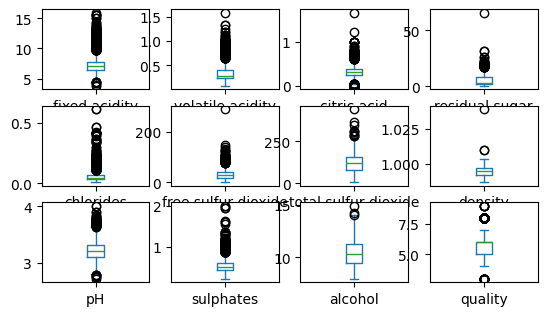

In [8]:
wine.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

In [9]:
wine['label'] = wine['quality'].apply(lambda x: 1 if x >= 6 else 0)

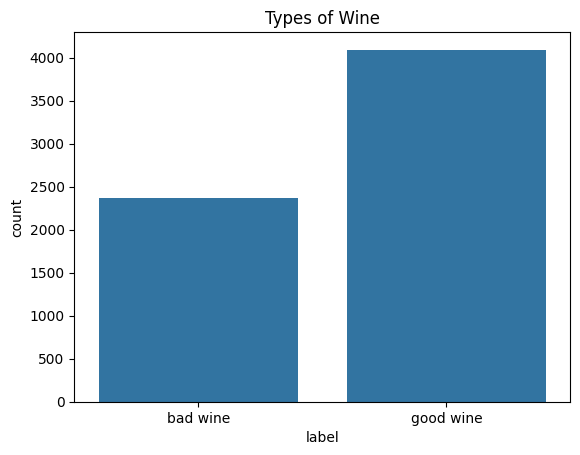

In [10]:
sns.countplot(data = wine, x = 'label')
plt.xticks([0,1], ['bad wine','good wine'])
plt.title("Types of Wine")
plt.show()


## Data Resampling

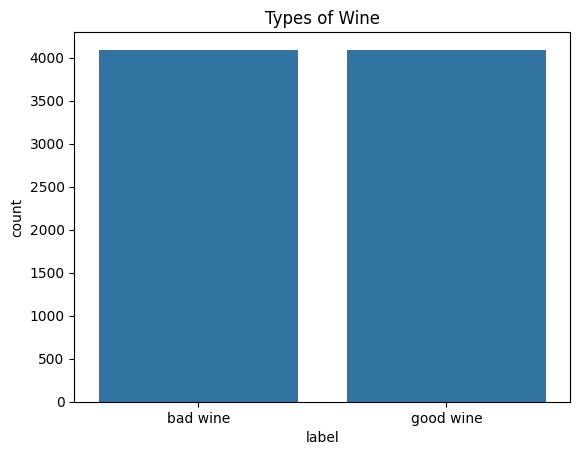

In [11]:
X = wine[['fixed acidity', 'volatile acidity', 'sulphates', 'alcohol', 'density']]
y = wine.label
oversample = SMOTE()
X_ros, y_ros = oversample.fit_resample(X, y)
sns.countplot(x=y_ros)
plt.xticks([0,1], ['bad wine','good wine'])
plt.title("Types of Wine")
plt.show()

### Data Splitting

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### XGboost

In [13]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

Accuracy Score: 0.7896365042536736


### Random forest

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix

In [15]:
seed = 8 # set seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=seed)

In [16]:
RF_clf = RandomForestClassifier(random_state=seed)
cv_scores = cross_val_score(RF_clf,X_train, y_train, cv=10, scoring='accuracy')
RF_clf.fit(X_train, y_train)
pred_RF = RF_clf.predict(X_test)
print("Accuracy Score:",accuracy_score(y_test,pred_RF))

Accuracy Score: 0.8252126836813611


### KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.7478731631863882


### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', random_state=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy score with Decision Tree: ", accuracy_score(y_test, y_pred))

Accuracy score with Decision Tree:  0.774168600154679


### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.6272235112142305


In [21]:
results = pd.DataFrame({
    'Model': ['XGboost','Random Forest','KNN','Decision Tree' ,'Logistic Regression'],
    'Score (in %)': [78.9,82.7,74.7,77.4,62.7]})

result_df = results.sort_values(by='Score (in %)', ascending=False)
result_df = result_df.set_index('Score (in %)')
result_df


,Model
Score (in %),
82.7,Random Forest
78.9,XGboost
77.4,Decision Tree
74.7,KNN
62.7,Logistic Regression


### Therefore we will use Random forest

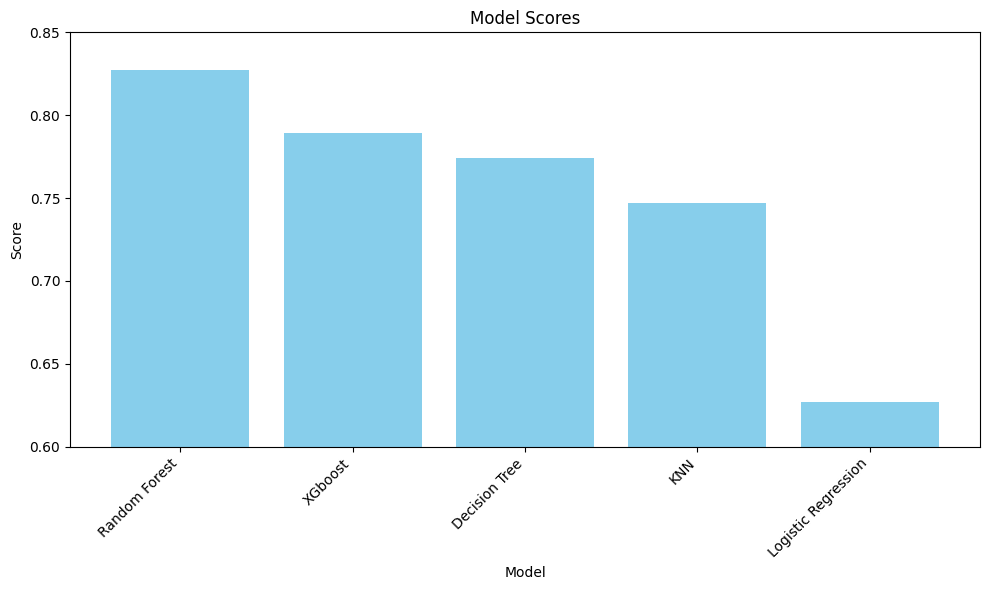

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.DataFrame({
    'Model': ['XGboost', 'Random Forest', 'KNN', 'Decision Tree', 'Logistic Regression'],
    'Score': [0.789, 0.827, 0.747, 0.774, 0.627]
})

result_df = results.sort_values(by='Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(result_df['Model'], result_df['Score'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Scores')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.6, 0.85)
plt.tight_layout()
plt.show()


In [23]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Save the model to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(RF_clf, file)

In [24]:
!pip install streamlit

In [25]:
%%writefile Wine_quality.py
import streamlit as st
import pandas as pd
import pickle
from sklearn.ensemble import ExtraTreesClassifier

# Function to load data
def load_data():
    return pd.read_csv("winequalityN.csv")

# Load the pre-trained Random Forest model
@st.cache(allow_output_mutation=True)
def load_model():
    with open('model.pkl', 'rb') as file:
        model = pickle.load(file)
    return model

# Main function to run the Streamlit app
def main():
    # Load data
    wine_df = load_data()

    # Load model
    classifiern = load_model()

    # Sidebar inputs
    st.sidebar.header('User Input Parameters')
    fixed_acidity = st.sidebar.slider('Fixed Acidity', float(wine_df['fixed acidity'].min()), float(wine_df['fixed acidity'].max()), float(wine_df['fixed acidity'].mean()))
    volatile_acidity = st.sidebar.slider('Volatile Acidity', float(wine_df['volatile acidity'].min()), float(wine_df['volatile acidity'].max()), float(wine_df['volatile acidity'].mean()))
    sulphates = st.sidebar.slider('Sulphates', float(wine_df['sulphates'].min()), float(wine_df['sulphates'].max()), float(wine_df['sulphates'].mean()))
    alcohol = st.sidebar.slider('Alcohol', float(wine_df['alcohol'].min()), float(wine_df['alcohol'].max()), float(wine_df['alcohol'].mean()))
    density = st.sidebar.slider('Density', float(wine_df['density'].min()), float(wine_df['density'].max()), float(wine_df['density'].mean()))

    # Adjust the column names in the input_df
    input_df = pd.DataFrame({
        'fixed acidity': fixed_acidity,
        'volatile acidity': volatile_acidity,
        'sulphates': sulphates,
        'alcohol': alcohol,
        'density': density
    }, index=[0])

    # Predict wine quality
    prediction_proba = classifiern.predict_proba(input_df)
    prediction = classifiern.predict(input_df)[0]

    # Determine if the wine is good or bad based on the predicted quality
    if prediction == 1:
        wine_quality = "Good"
    else:
        wine_quality = "Bad"

    # Display predictions
    st.subheader('Prediction')
    st.write('Predicted Quality:', prediction)
    st.write('Prediction Probabilities:', prediction_proba)
    st.write('Wine Quality:', wine_quality)

# Run the Streamlit app
if __name__ == '__main__':
    main()


Overwriting Wine_quality.py


In [ ]:
!streamlit run Wine_quality.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://10.4.3.192:8501

  For better performance, install the Watchdog module:

  $ xcode-select --install
  $ pip install watchdog
            
2024-04-22 13:25:24.402 `st.cache` is deprecated. Please use one of Streamlit's new caching commands,
`st.cache_data` or `st.cache_resource`.

More information [in our docs](https://docs.streamlit.io/library/advanced-features/caching).
2024-04-22 13:38:14.096 `st.cache` is deprecated. Please use one of Streamlit's new caching commands,
`st.cache_data` or `st.cache_resource`.

More information [in our docs](https://docs.streamlit.io/library/advanced-features/caching).
2024-04-22 13:38:16.067 `st.cache` is deprecated. Please use one of Streamlit's new caching commands,
`st.cache_data` or `st.cache_resource`.

More information [in our docs](https://docs.streamlit.io/library/advanced-features/caching).
2024-04-22 13:38:16.456 `st.cache` is de